<a href="https://colab.research.google.com/github/xp348/intelligent-information-systems/blob/main/%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_Python_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_9_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотеки:

In [ ]:
import matplotlib.pyplot as plt               #Для вывода графиков
from scipy.fftpack import fft, ifft          #Для расчета FFT
import numpy as np
from scipy import signal                      #Отсюда будем вытаскивать фильтры
import librosa                                #Для параметризации аудио
import librosa.display                        #Для отображения аудио сигналов
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import IPython.display as ipd                 #Для проигрывания аудио
import scipy

%matplotlib inline

In [ ]:
A=1.0 # Амплитуда сигнала
f=10 # Частота сигнала Hz
phi=1 # Начальная фаза синусоиды "Радианы"
fs=50 # Частота семплирования Hz
t=0.1 # продолжительность сигнала (секунды)

**Light**

Задание 1:

Переписать функцию Sine , таким образом, чтобы на выходе получать сигнал косинуса вместо синуса (np.cos)


















In [ ]:
def Sine(A, f, phi, fs, t, N):
    T = t/fs         # Период семплирования
    n = np.arange(N) # Кол-во семплов
    x = A*np.sin(2*np.pi*f*n*T + phi)
    return x, n

In [ ]:
def Cosine(A, f, phi, fs, t, N):
    T = t/fs         # Период семплирования
    n = np.arange(N) # Кол-во семплов
    x = A*np.cos(2*np.pi*f*n*T + phi)
    return x, n

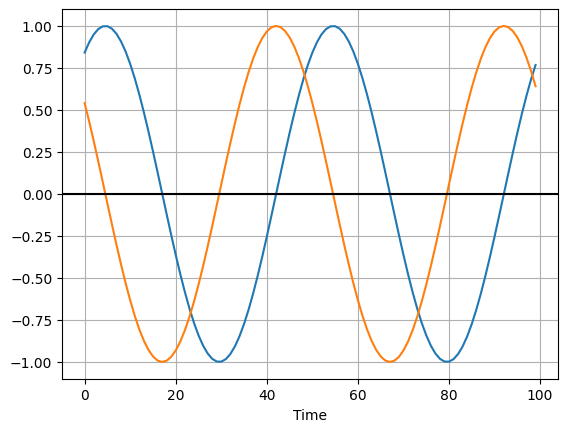

In [ ]:
plt.plot(Sine(A, f, phi, fs, t, 100)[0])
plt.plot(Cosine(A, f, phi, fs, t, 100)[0])
plt.xlabel('Time')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Задание 2:

Модифицировать функцию Sine таким образом чтобы можно было взвращать составной сигнал - состоящий из комбинаций sin и cos, каждая отдельная гармоническая функция в составном сигнале должна принимать свои параметры:

A = Амплитуда сигнала

f = Частота сигнала Hz

phi = Начальная фаза синусоиды "Радианы"

Сделайте вариант с 2-мя и 3-мя гармоническими сигналами

Задание 3:

Дан сигнал 3np.sin(2np.pi5.45*0.002 + 2.) Перепишите выражение таким образом, чтобы: а) амплитуда увеличилась в 2 раза б) Фаза сигнала была в 0.

 Амплитуда сигнала *np.cos(2*np.pi*Частота сигнала Hz*Кол-во семплов*(продолжительность сигнала/Частота семплирования Hz) + Начальная фаза синусоиды "Радианы")

ответ: 6np.sin(2*np.pi*5.45*0.002 + 0)

Задание 4:

Сигнал задан следующей функцией:
t = np.linspace(0, 1, n, endpoint=True)
np.sin(3*np.pi*t) + np.sin(5*np.pi*t)
Отобразить на графике Аналоговый, Дискретный и Квантованные сигналы

<ipython-input-40-2500b3725738>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  return plt.stem(*args, **kwargs)  #Дискретный сигнал


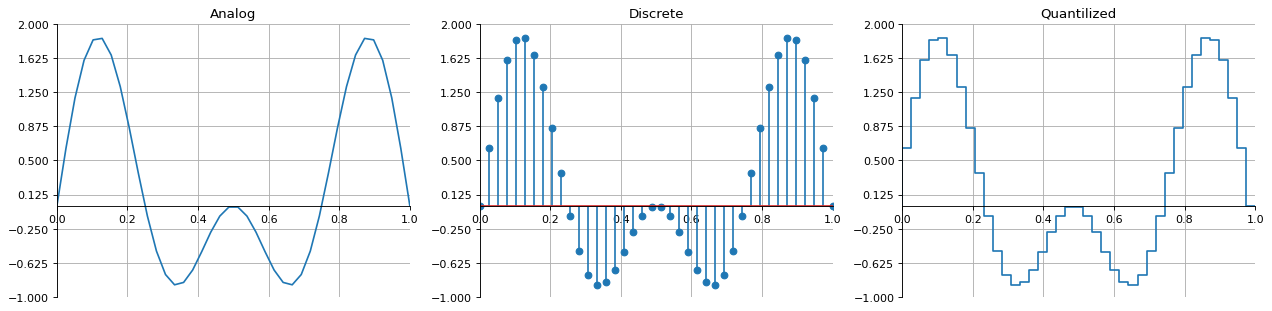

In [40]:
n = 40
#Временной вектор
t = np.linspace(0, 1, n, endpoint=True)

x = np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)            #Аналоговый сигнал
    if s == 1:
        return plt.stem(*args, **kwargs)  #Дискретный сигнал
    if s == 2:
        return plt.step(*args)            #Квантованный сигнал

t_titles = ['Analog', 'Discrete', 'Quantilized']

#Вывод графика
plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i])
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9)) #Для подписи Оy генерируем набор значений с нижней (floor)
    plt.grid(True)                                                      #Верхней границей

    #Задаем тип отображения (оси)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))

#Подстраиваем наши subplot под размеры plt.figure
plt.tight_layout()

Задание 5:

Загрузите любой аудио сигнал и сделайте его Фурье преобразование. Выведите на графике амплитудный спектр.

In [21]:
audio_patch = 'Velada (1).wav'
ipd.Audio(audio_patch)
x, sr = librosa.load(audio_patch)



<ipython-input-21-f35c3c26d167>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  x_viol, sr_viol = librosa.load('/Velada (1).wav')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored

Задача 6:

Найдите модуль и аргумент спектра для следующего сигнала гармонического сигнала: синус (np.sin) С Частотой 20Гц Амплитудой 3 И фазой 1

In [22]:
A = 3
f = 20
u = 1
N = 40
t = np.linspace(0, 1, N)

x = A*np.sin(2*np.pi*f*t + u)
x_fft = fft(x) #фаза
x_abs = 2*np.abs(x) #модуль
print(x_fft)
print('_________________________________________________________________')
print(x_abs)

[  2.52441295 -0.j           2.52403375 +0.20381848j
   2.52287713 +0.41019017j   2.520884   +0.62179815j
   2.5179486  +0.84159964j   2.51390621 +1.07300161j
   2.50851236 +1.32009157j   2.50140903 +1.587959j
   2.49206901 +1.88316568j   2.4797023  +2.21446446j
   2.46309265 +2.59394578j   2.4402989  +3.03895368j
   2.40807684 +3.575462j     2.36067777 +4.24441583j
   2.28711616 +5.11463131j   2.16418277 +6.31191297j
   1.93546239 +8.09489965j   1.43145572+11.09975754j
  -0.08498225+17.4827184j  -10.87186588+44.59897905j
  40.22239031 -0.j         -10.87186588-44.59897905j
  -0.08498225-17.4827184j    1.43145572-11.09975754j
   1.93546239 -8.09489965j   2.16418277 -6.31191297j
   2.28711616 -5.11463131j   2.36067777 -4.24441583j
   2.40807684 -3.575462j     2.4402989  -3.03895368j
   2.46309265 -2.59394578j   2.4797023  -2.21446446j
   2.49206901 -1.88316568j   2.50140903 -1.587959j
   2.50851236 -1.32009157j   2.51390621 -1.07300161j
   2.5179486  -0.84159964j   2.520884   -0.6217981

**PRO**


Задача 1:

Найдите модуль спектра для следующего сигнала [5,3,0,0,0,-1,3, 3, 5, 0].


In [23]:
x = [5, 3, 0, 0, 0, -1, 3, 3, 5, 0]
N = 10
x_fft = fft(x) #фаза
x_abs = 2*np.abs(x_fft) / N #модуль
print(x_abs)

[3.6        2.01679863 0.91454535 1.28550507 1.13296372 1.6
 1.13296372 1.28550507 0.91454535 2.01679863]


Задача 2:

Дан сложный сигнал состаящий из 4-х гармонических компонент (синус) с различными значениями амплитуд и частот. Выведите спектр сигнала, на основе спектра определите частоты и амплитуды гармонических составляющих

сигнал (50 отсчетов): [ 0.00000000e+00, 6.61225969e+00, 3.25848078e+00, -1.20084548e+00, 3.45301249e+00, 8.94406332e+00, 4.69738850e+00, -1.36112077e+00, 2.18739790e+00, 8.35228095e+00, 5.25735866e+00, -1.07697134e+00, 1.30202985e+00, 6.87594476e+00, 3.25150704e+00, -4.69190350e+00, -3.88118391e+00, 2.10527395e+00, 3.66950398e-01, -6.14121684e+00, -4.38906614e+00, 3.21326193e+00, 3.07651304e+00, -3.62470149e+00, -3.41879558e+00, 3.41879558e+00, 3.62470149e+00, -3.07651304e+00, -3.21326193e+00, 4.38906614e+00, 6.14121684e+00, -3.66950398e-01, -2.10527395e+00, 3.88118391e+00, 4.69190350e+00, -3.25150704e+00, -6.87594476e+00, -1.30202985e+00, 1.07697134e+00, -5.25735866e+00, -8.35228095e+00, -2.18739790e+00, 1.36112077e+00, -4.69738850e+00, -8.94406332e+00, -3.45301249e+00, 1.20084548e+00, -3.25848078e+00, -6.61225969e+00, -1.78798433e-14]

<ipython-input-38-73f094ab3bf9>:21: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)
<ipython-input-38-73f094ab3bf9>:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(X, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)


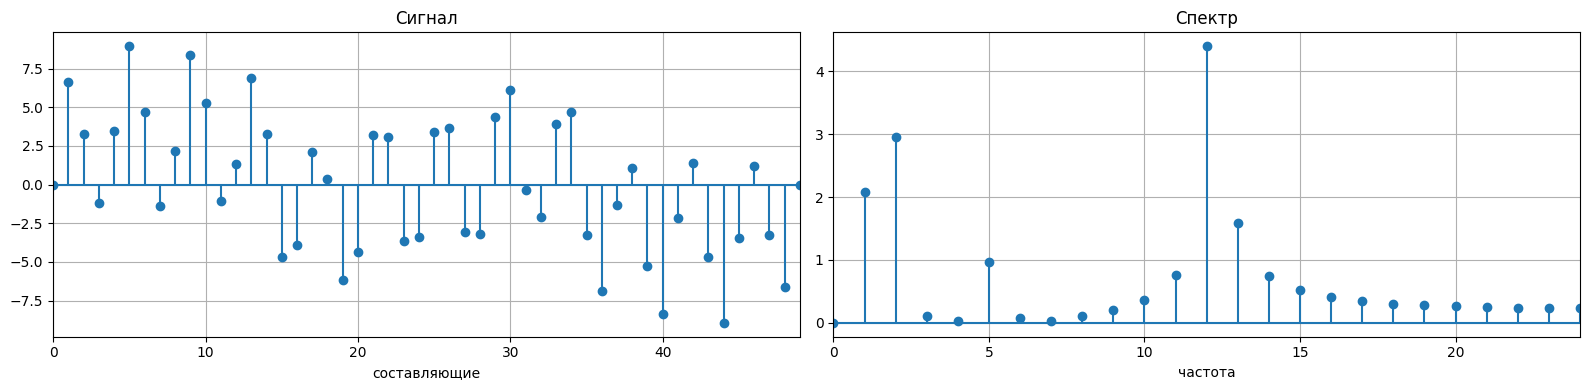

In [38]:
N = 50

x =  [ 0.00000000e+00, 6.61225969e+00, 3.25848078e+00, -1.20084548e+00, 3.45301249e+00, 8.94406332e+00,
      4.69738850e+00, -1.36112077e+00, 2.18739790e+00, 8.35228095e+00, 5.25735866e+00, -1.07697134e+00,
      1.30202985e+00, 6.87594476e+00, 3.25150704e+00, -4.69190350e+00, -3.88118391e+00, 2.10527395e+00,
      3.66950398e-01, -6.14121684e+00, -4.38906614e+00, 3.21326193e+00, 3.07651304e+00, -3.62470149e+00,
      -3.41879558e+00, 3.41879558e+00, 3.62470149e+00, -3.07651304e+00, -3.21326193e+00, 4.38906614e+00,
      6.14121684e+00, -3.66950398e-01, -2.10527395e+00, 3.88118391e+00, 4.69190350e+00, -3.25150704e+00,
      -6.87594476e+00, -1.30202985e+00, 1.07697134e+00, -5.25735866e+00, -8.35228095e+00, -2.18739790e+00,
      1.36112077e+00, -4.69738850e+00, -8.94406332e+00, -3.45301249e+00, 1.20084548e+00, -3.25848078e+00,
      -6.61225969e+00, -1.78798433e-14]

X = fft(x) #фаза
X = 2*np.abs(X) / N #Выводим амплитудную характеристику, нормализуем по N          (модуль)

#Выводим результаты
plt.figure(figsize=(16, 4), dpi=100)
#Сигнал
plt.subplot(1, 2, 1)
plt.title('Сигнал')
plt.stem(x, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)
plt.xlim([0, N-1])
plt.xlabel('составляющие')
plt.grid()

#Амплитудный спектр
plt.subplot(1, 2, 2)
plt.title('Спектр')
plt.stem(X, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)
plt.xlim([0, N//2-1])
plt.xlabel('частота')
plt.grid()
plt.tight_layout()

Задача 3:

Самостоятельно ознакомившись с тем что такое Автокорреляционная функция рассчитать и отобразить графически Автокорреляционную функцию прямоугольного импульса: [np.zeros(8), np.ones(3), np.zeros(8)] , Напишите функцию вычисляющую автокорреляцию.

Задача 4:

Попробуйте подобрать другой тип сигнала (например, ЭКГ, временной ряд и т.д.) и сделать его преобразование Фурье. Выведите его спектрограмму и полученный после преобразования амплитудный спектр

